https://www.kaggle.com/code/ritvikteja/predicting-startup-success#Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import numpy as np

sns.set_style("whitegrid")
sns.set()

In [2]:
df = pd.read_csv('investments_VC.csv', encoding='utf-8', encoding_errors='replace')
df = df.set_index('name')
df.shape

(49438, 38)

In [3]:
df.head(5)

,permalink,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
name,,,,,,,,,,,,,,,,,,,,,
#waywire,/organization/waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,...,0,0,0,0,0,0,0,0,0,0
&TV Communications,/organization/tv-communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
'Rock' Your Paper,/organization/rock-your-paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,...,0,0,0,0,0,0,0,0,0,0
(In)Touch Network,/organization/in-touch-network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,...,0,0,0,0,0,0,0,0,0,0
-R- Ranch and Mine,/organization/r-ranch-and-mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.loc["#waywire"]

permalink                                    /organization/waywire
homepage_url                                http://www.waywire.com
category_list           |Entertainment|Politics|Social Media|News|
 market                                                      News 
 funding_total_usd                                      17,50,000 
status                                                    acquired
country_code                                                   USA
state_code                                                      NY
region                                               New York City
city                                                      New York
funding_rounds                                                   1
founded_at                                              01/06/2012
founded_month                                              2012-06
founded_quarter                                            2012-Q2
founded_year                                                20

In [5]:
df['status'].value_counts()

status
operating    41829
acquired      3692
closed        2603
Name: count, dtype: int64

In [6]:
df = df.dropna()#isna().sum()

In [7]:
df = df.drop(columns=['permalink',
                      'homepage_url',
                      # 'category_list',
                      # 'state_code',
                      'founded_at',
                      'founded_month', 
                      'founded_quarter',
                      'founded_year', 
                      'first_funding_at', 
                      'last_funding_at',
                     ])

In [8]:
cat_cols = ['category_list',
            ' market ',
            ' funding_total_usd ',
            'status',
            'country_code',
            'state_code',
            'region',
            'city',
           ]
for col in cat_cols:
    df[col] = df[col].astype('category')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["status"]),
    df["status"],
    train_size=0.8,
    random_state=0,
)

In [10]:
(df['status'].value_counts()/df.shape[0]).values

array([0.84468864, 0.10082418, 0.05448718])

In [11]:
import lightgbm as lgb

clf_lgb = lgb.LGBMClassifier(max_depth=5, n_estimators=10, random_state=0, class_weight='balanced')
clf_lgb.fit(X_train, y_train)#, eval_metric="logloss")

print(
    "Training set score (mean accuracy): {:.4f}".format(clf_lgb.score(X_train, y_train))
)
print("Test set score (mean accuracy): {:.4f}".format(clf_lgb.score(X_test, y_test)))

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4775
[LightGBM] [Info] Number of data points in the train set: 17472, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [12]:
import shap
shap.initjs()

/layers/paketo-buildpacks_poetry-install/poetry-venv/datascience-python-renku-dependencies-xS3fZVNL-py3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# First of all, let's build the explainer
explainer = shap.TreeExplainer(clf_lgb)
shap_values = explainer(X_train)

In [14]:
# Phone model under investigation
company = "mPura"

feature_vector = X_test.loc[[company]]
feature_vector.T

name,mPura
category_list,|Hospitality|
market,Hospitality
funding_total_usd,"2,00,000"
country_code,USA
state_code,CA
region,SF Bay Area
city,Fremont
funding_rounds,1
seed,0
venture,0


<br>

## 2.1. Explain overall impact of features

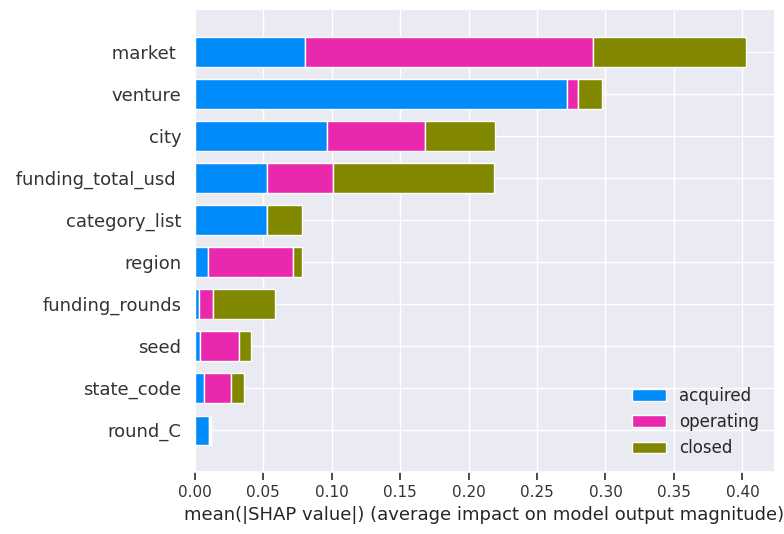

In [15]:
# Show average shap value per class
shap.summary_plot(
    shap_values, X_train, class_names=clf_lgb.classes_, plot_type="bar", max_display=10
)

<br>

## 2.2. Explain individual prediction 

In [16]:
# Remember that shap_values() returns a list with 1 element per class. Here we need to know the index of the prediced class to find the shap values of our prediction
idx_predicted_class = np.argmax(clf_lgb.predict_proba(feature_vector))
idx_predicted_class

np.int64(1)

In [17]:
company_shap_values = explainer(feature_vector)


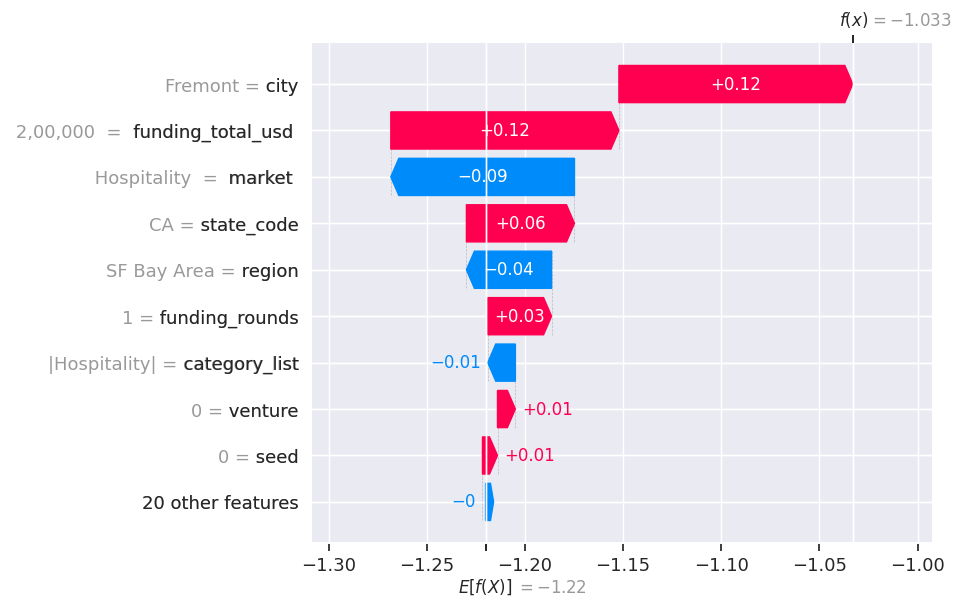

In [18]:
# shap.plots.waterfall(shap_values[0,:,idx_predicted_class])
shap.plots.waterfall(company_shap_values[0,:,idx_predicted_class])